#### Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [23]:
df_daily = pd.read_pickle('df_daily.pickle')
df_daily.head(3)

ENTRIES_DIFF  EXITS_DIFF  TOTAL_DIFF
C/A  UNIT SCP      STATION DATE                                            
A002 R051 02-00-00 59 ST   03/26/2016           0.0         5.0         5.0
                           03/27/2016           0.0         0.0         0.0
                           03/28/2016         945.0       652.0      1597.0

In [24]:
# filter for a turnstile

df_turnstile = df_daily.ix['A002']
df_turnstile = df_turnstile.ix['R051']
df_turnstile = df_turnstile.ix['02-00-00']
df_turnstile = df_turnstile.ix['59 ST']
df_turnstile = df_turnstile.reset_index()
df_turnstile['DATE'] = pd.to_datetime(df_turnstile['DATE'], format='%m/%d/%Y')
df_turnstile

,DATE,ENTRIES_DIFF,EXITS_DIFF,TOTAL_DIFF
0,2016-03-26,0.0,5.0,5.0
1,2016-03-27,0.0,0.0,0.0
2,2016-03-28,945.0,652.0,1597.0
3,2016-03-29,1144.0,875.0,2019.0
4,2016-03-30,1144.0,848.0,1992.0
5,2016-03-31,454.0,318.0,772.0
6,2016-04-01,1207.0,284.0,1491.0


In [25]:
dates = df_turnstile['DATE'].tolist()
dates

[Timestamp('2016-03-26 00:00:00'),
 Timestamp('2016-03-27 00:00:00'),
 Timestamp('2016-03-28 00:00:00'),
 Timestamp('2016-03-29 00:00:00'),
 Timestamp('2016-03-30 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-01 00:00:00')]

In [26]:
counts = df_turnstile['TOTAL_DIFF'].tolist()
counts

[5.0, 0.0, 1597.0, 2019.0, 1992.0, 772.0, 1491.0]

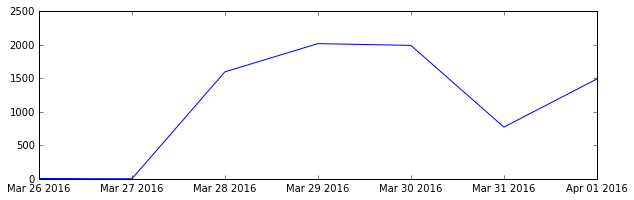

In [27]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

#### Challenge 5

So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [28]:
df_daily = df_daily.reset_index()
df_daily.drop('SCP', axis=1, inplace=True)
df_daily.head()

,C/A,UNIT,STATION,DATE,ENTRIES_DIFF,EXITS_DIFF,TOTAL_DIFF
0,A002,R051,59 ST,03/26/2016,0.0,5.0,5.0
1,A002,R051,59 ST,03/27/2016,0.0,0.0,0.0
2,A002,R051,59 ST,03/28/2016,945.0,652.0,1597.0
3,A002,R051,59 ST,03/29/2016,1144.0,875.0,2019.0
4,A002,R051,59 ST,03/30/2016,1144.0,848.0,1992.0


In [29]:
df_daily = df_daily.groupby(['C/A', 'UNIT','STATION','DATE']).sum()
df_daily.head()

ENTRIES_DIFF  EXITS_DIFF  TOTAL_DIFF
C/A  UNIT STATION DATE                                            
A002 R051 59 ST   03/26/2016        1664.0       231.0      1895.0
                  03/27/2016        1740.0       276.0      2016.0
                  03/28/2016       12991.0      9259.0     22250.0
                  03/29/2016       16493.0     10725.0     27218.0
                  03/30/2016       16662.0     10930.0     27592.0

#### Challenge 6

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.

In [30]:
df_daily = df_daily.reset_index()
df_daily.head()

,C/A,UNIT,STATION,DATE,ENTRIES_DIFF,EXITS_DIFF,TOTAL_DIFF
0,A002,R051,59 ST,03/26/2016,1664.0,231.0,1895.0
1,A002,R051,59 ST,03/27/2016,1740.0,276.0,2016.0
2,A002,R051,59 ST,03/28/2016,12991.0,9259.0,22250.0
3,A002,R051,59 ST,03/29/2016,16493.0,10725.0,27218.0
4,A002,R051,59 ST,03/30/2016,16662.0,10930.0,27592.0


In [31]:
df_daily = df_daily.groupby(['STATION','DATE']).sum()
df_daily.head()

ENTRIES_DIFF  EXITS_DIFF  TOTAL_DIFF
STATION DATE                                            
1 AV    03/26/2016       14379.0     12567.0     26946.0
        03/27/2016       15238.0     13530.0     28768.0
        03/28/2016       21823.0     18583.0     40406.0
        03/29/2016       23909.0     19799.0     43708.0
        03/30/2016       24490.0     20575.0     45065.0

#### Challenge 7

Plot the time series for a station.

In [36]:
df_daily = df_daily.reset_index()
df_daily.head()

,STATION,DATE,ENTRIES_DIFF,EXITS_DIFF,TOTAL_DIFF
0,1 AV,03/26/2016,14379.0,12567.0,26946.0
1,1 AV,03/27/2016,15238.0,13530.0,28768.0
2,1 AV,03/28/2016,21823.0,18583.0,40406.0
3,1 AV,03/29/2016,23909.0,19799.0,43708.0
4,1 AV,03/30/2016,24490.0,20575.0,45065.0


In [37]:
dates = df_turnstile['DATE'].tolist()
dates

[Timestamp('2016-03-26 00:00:00'),
 Timestamp('2016-03-27 00:00:00'),
 Timestamp('2016-03-28 00:00:00'),
 Timestamp('2016-03-29 00:00:00'),
 Timestamp('2016-03-30 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-01 00:00:00')]

In [38]:
counts = df_turnstile['TOTAL_DIFF'].tolist()
counts

[5.0, 0.0, 1597.0, 2019.0, 1992.0, 772.0, 1491.0]

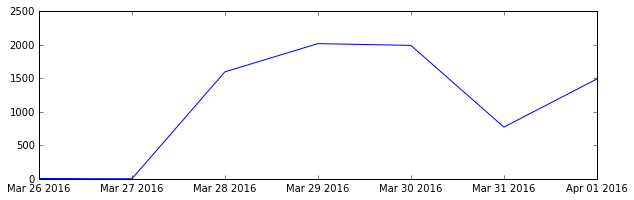

In [39]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

#### Challenge 8

Make one list of counts for **one** week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. 

Make the same list for another week, and another week, and another
week.

`plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.